In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
%matplotlib inline

In [2]:
#Importing the data files into pandas data frames
purchase_behaviour=pd.read_csv('QVI_purchase_behaviour.csv')
transaction_data=pd.read_excel('QVI_transaction_data.xlsx')

<h4>Analyzing Purchase_Behaviour Data</h4>

In [3]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
#Checking for NULL values and datatypes of column data
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
#Checking for duplicate values
purchase_behaviour[purchase_behaviour.duplicated()]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER


LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64


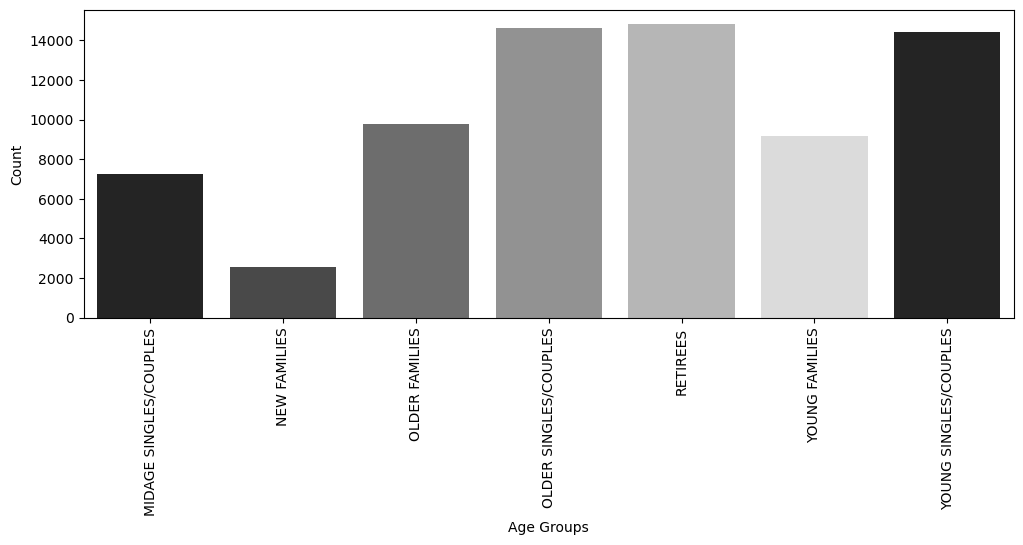

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64


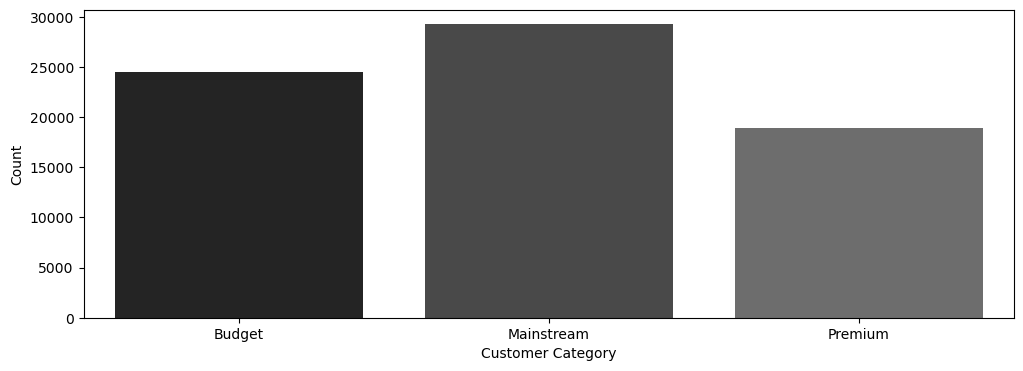

In [6]:
#Setting color palette
pal=sns.color_palette(palette='gist_gray')

#Checking age-group categories and count of data in each category
print(purchase_behaviour['LIFESTAGE'].value_counts())
lifestage_bar=purchase_behaviour.groupby('LIFESTAGE')['LIFESTAGE'].count()
plt.figure(figsize=(12,4))
sns.barplot(x=lifestage_bar.index,y=lifestage_bar.values, palette=pal)
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

#Checking customer class categories and count of data in each category
print(purchase_behaviour['PREMIUM_CUSTOMER'].value_counts())
premium_bar=purchase_behaviour.groupby('PREMIUM_CUSTOMER')['PREMIUM_CUSTOMER'].count()
plt.figure(figsize=(12,4))
sns.barplot(x=premium_bar.index,y=premium_bar.values, palette=pal)
plt.xlabel("Customer Category")
plt.ylabel("Count")
plt.show()

<h5>Observations</h5>
<div>On observing the bar graphs and count of entries in each categories, we can see that - </div>
<ul><li>RETIREES, OLDER SINGLES/COUPLES and YOUNG SINGLES/COUPLES consume most chips in the given demographic</li>
<li>NEW FAMILIES consume the least on chips</li>
<li>There are more Mainstream type customers than Budget or Premium types</li></ul>

<ul><li>Customers belonging to RETIREES, OLDER SINGLES/COUPLES and YOUNG SINGLES/COUPLES groups are over 14000 each</li>
<li>NEW FAMILIES group constitute of close to 2500 customers</li>
<li>Number of Mainstream type customers are close to 30000</li></ul>

<h4>Analyzing Transaction_Data </h4>

In [7]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
#Checking for NULL values and datatypes of column data
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [9]:
#Converting datatype of the date field to Datetime
transaction_data['DATE']=pd.to_datetime(transaction_data['DATE'], unit='D', origin='1899-12-30')

#Extracting Date, Month, Day and Weekday from Date column
transaction_data['DATE_YEAR']=transaction_data['DATE'].dt.year
transaction_data['DATE_MONTH']=transaction_data['DATE'].dt.month_name()
transaction_data['DATE_MONTH']=transaction_data['DATE'].dt.month
transaction_data['DATE_DAY']=transaction_data['DATE'].dt.day
transaction_data['DATE_WEEKDAY']=transaction_data['DATE'].dt.day_name()

#Extracting integer from PROD_NAME column for Packet Size
packetsize=transaction_data['PROD_NAME'].str.extract('(\d+)')
transaction_data['PKT_SIZE']=packetsize.astype('int')

#Creating column for Price per Pack
transaction_data['PRICE_PER_PACK']=transaction_data['TOT_SALES']/transaction_data['PROD_QTY']

#Removing non-chips rows from dataset
transaction_data = transaction_data[transaction_data['PROD_NAME'] != 'salsa']

transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_YEAR,DATE_MONTH,DATE_DAY,DATE_WEEKDAY,PKT_SIZE,PRICE_PER_PACK
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,17,Wednesday,175,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5,14,Tuesday,175,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5,20,Monday,170,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,8,17,Friday,175,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,8,18,Saturday,150,4.60


In [10]:
#Renaming Brand names for uniformity
products=transaction_data[['PROD_NAME']]
products=products.replace('CCs','CC',regex=True)
products=products.replace('NCC','Natural',regex=True)
products=products.replace('Red Rock Deli','RRD',regex=True)
products=products.replace('Doritos Corn Chip','Doritos',regex=True)
products=products.replace('DCC','Doritos',regex=True)
products=products.replace('DCCs','Doritos',regex=True)
products=products.replace('Doritoss','Doritos',regex=True)
products=products.replace('Smiths Crinkle Cut Chips','Smith',regex=True)
products=products.replace('Smithss','Smith',regex=True)
products=products.replace('Smiths','Smith',regex=True)
products=products.replace('Thins Chips','Thins',regex=True)
products=products.replace('Grain Waves','GW',regex=True)
products=products.replace('GrnWves','GW',regex=True)
products=products.replace('French Fries','FF',regex=True)
products=products.replace('Woolworths','WW',regex=True)

In [11]:
#Extracting Brand names to make a new column
products[['PROD_BRAND','PROD_FLAVOR']] = products['PROD_NAME'].str.split(' ', n=1, expand=True)
transaction_data['PROD_BRAND']=products['PROD_BRAND']

transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_YEAR,DATE_MONTH,DATE_DAY,DATE_WEEKDAY,PKT_SIZE,PRICE_PER_PACK,PROD_BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,17,Wednesday,175,3.00,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5,14,Tuesday,175,2.10,CC
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5,20,Monday,170,1.45,Smith
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,8,17,Friday,175,3.00,Smith
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,8,18,Saturday,150,4.60,Kettle


In [12]:
#Identifying the quantitative columns from the dataset
quant_cols=['PROD_QTY','TOT_SALES','PKT_SIZE']
transaction_data[quant_cols].describe()

,PROD_QTY,TOT_SALES,PKT_SIZE
count,264836.000000,264836.000000,264836.000000
mean,1.907309,7.304200,182.427004
std,0.643654,3.083226,64.327196
min,1.000000,1.500000,70.000000
25%,2.000000,5.400000,150.000000
50%,2.000000,7.400000,170.000000
75%,2.000000,9.200000,175.000000
max,200.000000,650.000000,380.000000


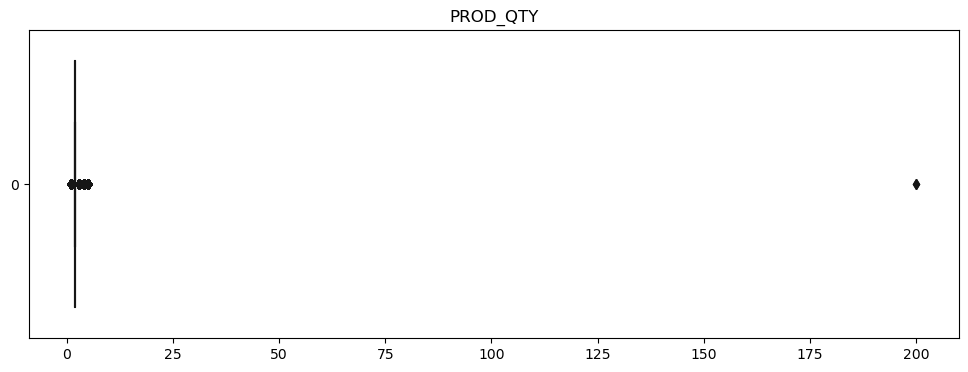

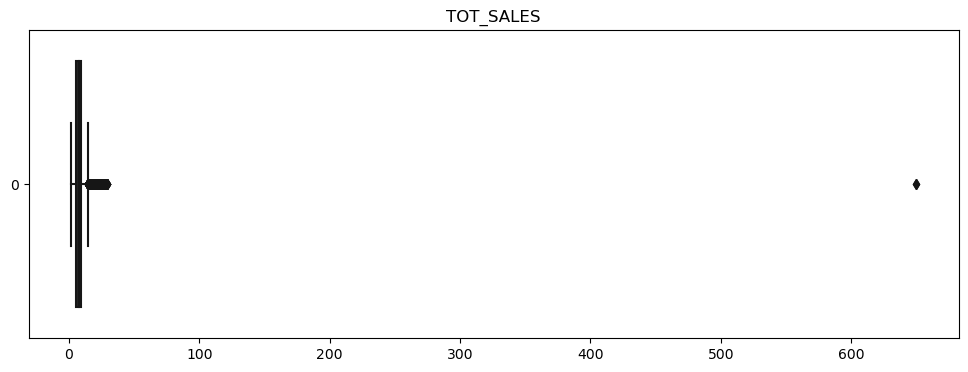

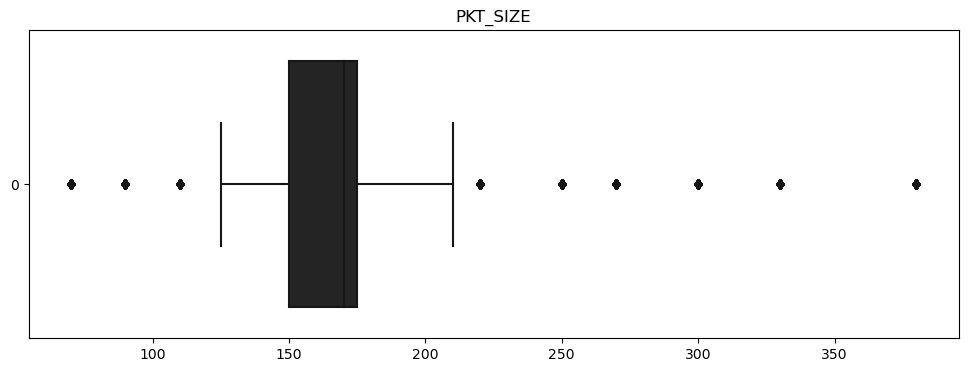

In [13]:
#Boxplots for identifying Outliers
for col in quant_cols:
    plt.figure(figsize=(12,4))
    sns.boxplot(transaction_data[col],orient="h", palette=pal)
    plt.title(col)

In [14]:
#Function to identify the Upper and Lower limits
def trim_outliers(column):
    sorted(column)
    print(column.name)
    Q1,Q3 = np.percentile(column,[25,75])
    IQR = Q3 - Q1
    lrange =Q1 - (1.5 * IQR)
    urange =Q3 + (1.5 * IQR)
    print('Lower Range =', lrange)
    print('Upper Range =', urange)

for col in quant_cols:
    trim_outliers(transaction_data[col])

PROD_QTY
Lower Range = 2.0
Upper Range = 2.0
TOT_SALES
Lower Range = -0.29999999999999805
Upper Range = 14.899999999999999
PKT_SIZE
Lower Range = 112.5
Upper Range = 212.5


In [15]:
transaction_data['PKT_SIZE'].value_counts()

PKT_SIZE
175    66390
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6418
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: count, dtype: int64

In [16]:
transaction_data['PROD_QTY'].value_counts()

PROD_QTY
2      236039
1       27518
5         450
3         430
4         397
200         2
Name: count, dtype: int64

In [17]:
#Checking the outliers
transaction_data[transaction_data['PROD_QTY']>10]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_YEAR,DATE_MONTH,DATE_DAY,DATE_WEEKDAY,PKT_SIZE,PRICE_PER_PACK,PROD_BRAND
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018,8,19,Sunday,380,3.25,Dorito
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019,5,20,Monday,380,3.25,Dorito


In [18]:
#Removing the Outliers beyond the Upper and Lower limits
transaction_data=transaction_data[transaction_data['PROD_QTY']<=2]
transaction_data=transaction_data[transaction_data['TOT_SALES']<100]
transaction_data=transaction_data[(transaction_data['PKT_SIZE']>=112.5)&(transaction_data['PKT_SIZE']<=225)]

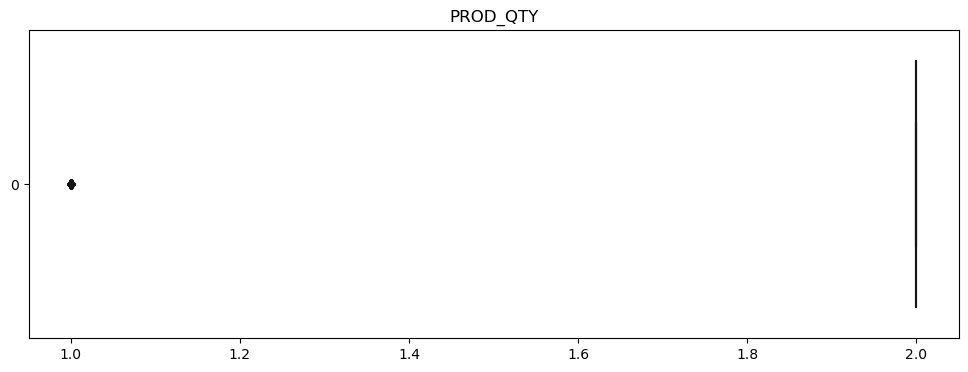

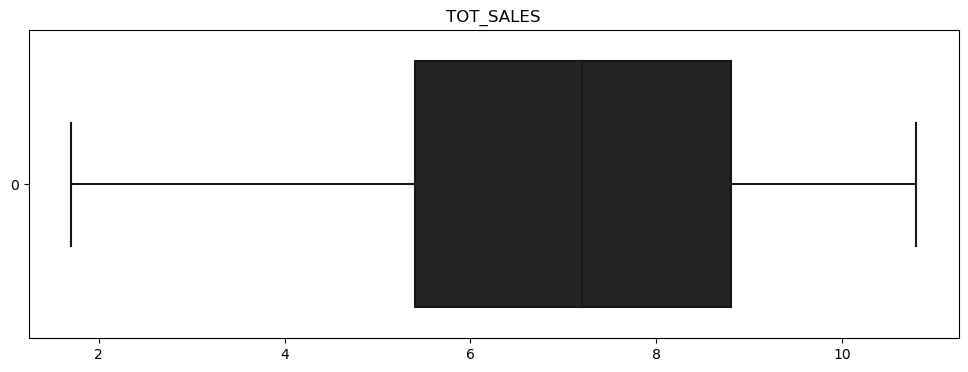

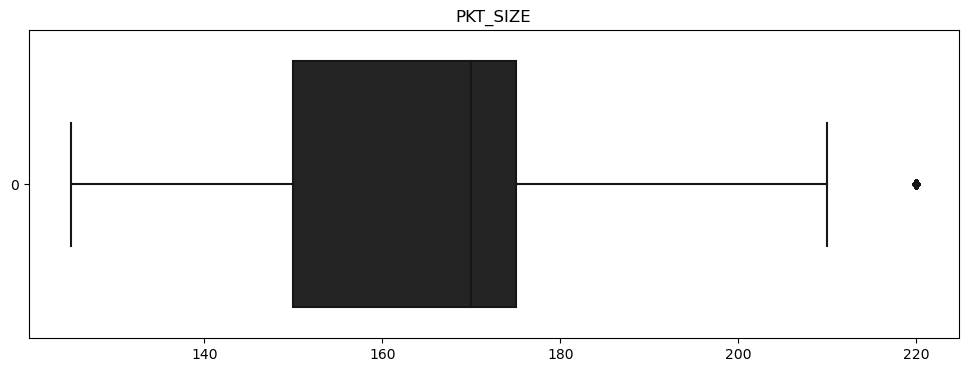

In [19]:
for col in quant_cols:
    plt.figure(figsize=(12,4))
    sns.boxplot(transaction_data[col],orient="h", palette=pal)
    plt.title(col)

In [20]:
print('Number of days recorded:',len(transaction_data['DATE'].unique()))
print('Number of stores:',len(transaction_data['STORE_NBR'].unique()))
print('Total transactions over recorder time period:',len(transaction_data['TXN_ID'].unique()))
print('Total sales over recorder time period:',transaction_data['TOT_SALES'].sum())
print('Number of brands selling chips:',len(transaction_data['PROD_BRAND'].unique()))

Number of days recorded: 364
Number of stores: 271
Total transactions over recorder time period: 192489
Total sales over recorder time period: 1333137.2
Number of brands selling chips: 16


In [21]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,DATE_YEAR,DATE_MONTH,DATE_DAY,PKT_SIZE,PRICE_PER_PACK
count,193410,193410.000000,1.934100e+05,1.934100e+05,193410.000000,193410.000000,193410.000000,193410.000000,193410.000000,193410.000000,193410.000000,193410.000000
mean,2018-12-30 00:07:43.248022272,135.050463,1.355266e+05,1.351315e+05,59.974484,1.894132,6.892804,2018.495264,6.534729,15.689246,163.919234,3.633750
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,2018.000000,1.000000,1.000000,125.000000,1.350000
25%,2018-09-30 00:00:00,70.000000,7.006400e+04,6.785725e+04,32.000000,2.000000,5.400000,2018.000000,4.000000,8.000000,150.000000,3.000000
50%,2018-12-30 00:00:00,130.000000,1.302850e+05,1.348330e+05,61.000000,2.000000,7.200000,2018.000000,7.000000,16.000000,170.000000,3.700000
75%,2019-03-31 00:00:00,203.000000,2.030380e+05,2.024425e+05,88.000000,2.000000,8.800000,2019.000000,10.000000,23.000000,175.000000,4.400000
max,2019-06-30 00:00:00,272.000000,2.370961e+06,2.415841e+06,114.000000,2.000000,10.800000,2019.000000,12.000000,31.000000,220.000000,5.400000
std,NaN,76.664519,8.063211e+04,7.805064e+04,32.044639,0.307670,2.186860,0.499979,3.452935,8.792808,19.138722,0.969067


<h5>Observations</h5>
<ul>
<li>The dataset records historic data spanning 364 days, from 2018-07-01 to 2019-06-30</li>
<li>A pack of chips sells for an average price of $3.63</li>
<li>Total sales recorded over the time period is $1333137.2</li>
<li>Packs of chips are mostly sold in twos</li>
<li>There are 271 stores that sell chips</li>
<li>Various flavors of chips are sold by 16 different brands</li>
<li>Number of Mainstream type customers are close to 30000</li></ul>

<h4>MERGE & EDA</h4>

In [22]:
#Merging the two datasets using Left Outer Join
df=pd.merge(transaction_data,purchase_behaviour,on='LYLTY_CARD_NBR',how='left')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_YEAR,DATE_MONTH,DATE_DAY,DATE_WEEKDAY,PKT_SIZE,PRICE_PER_PACK,PROD_BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,17,Wednesday,175,3.00,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5,20,Monday,170,1.45,Smith,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,2019,5,16,Thursday,210,3.60,GW,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,2018,8,20,Monday,150,3.90,Doritos,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,2018,8,18,Saturday,210,3.60,GW,MIDAGE SINGLES/COUPLES,Budget


In [23]:
#Exporting dataset to CSV file
df.to_csv('QVI_merged_data.csv')

In [24]:
#Checking for NULL values and datatypes of column data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193410 entries, 0 to 193409
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              193410 non-null  datetime64[ns]
 1   STORE_NBR         193410 non-null  int64         
 2   LYLTY_CARD_NBR    193410 non-null  int64         
 3   TXN_ID            193410 non-null  int64         
 4   PROD_NBR          193410 non-null  int64         
 5   PROD_NAME         193410 non-null  object        
 6   PROD_QTY          193410 non-null  int64         
 7   TOT_SALES         193410 non-null  float64       
 8   DATE_YEAR         193410 non-null  int32         
 9   DATE_MONTH        193410 non-null  int32         
 10  DATE_DAY          193410 non-null  int32         
 11  DATE_WEEKDAY      193410 non-null  object        
 12  PKT_SIZE          193410 non-null  int32         
 13  PRICE_PER_PACK    193410 non-null  float64       
 14  PROD

C:\Users\grksh\AppData\Local\Temp\ipykernel_31668\3274949886.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=salesperdate.index, y=salesperdate.values, palette=pal)


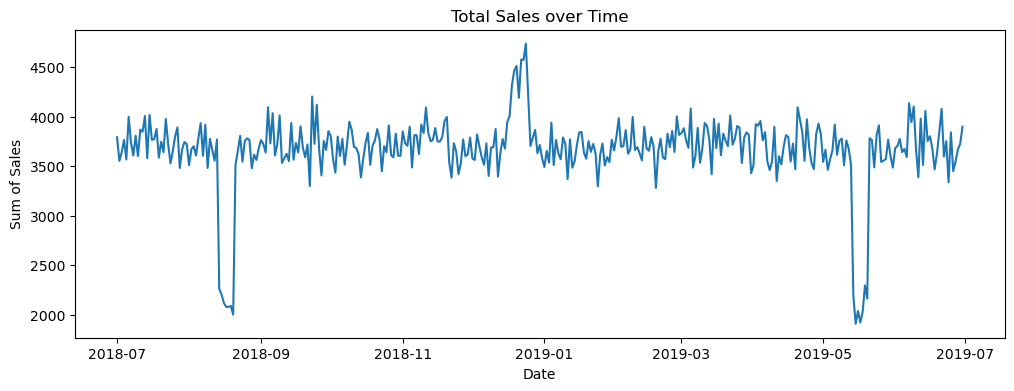

In [25]:
#Sales trend over time
salesperdate=df.groupby(df['DATE'])['TOT_SALES'].sum()
plt.figure(figsize=(12,4))
sns.lineplot(x=salesperdate.index, y=salesperdate.values, palette=pal)
plt.title("Total Sales over Time")
plt.xlabel("Date")
plt.ylabel("Sum of Sales")
plt.show()

C:\Users\grksh\AppData\Local\Temp\ipykernel_31668\2511535168.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=txnperdate.index, y=txnperdate.values, palette=pal)


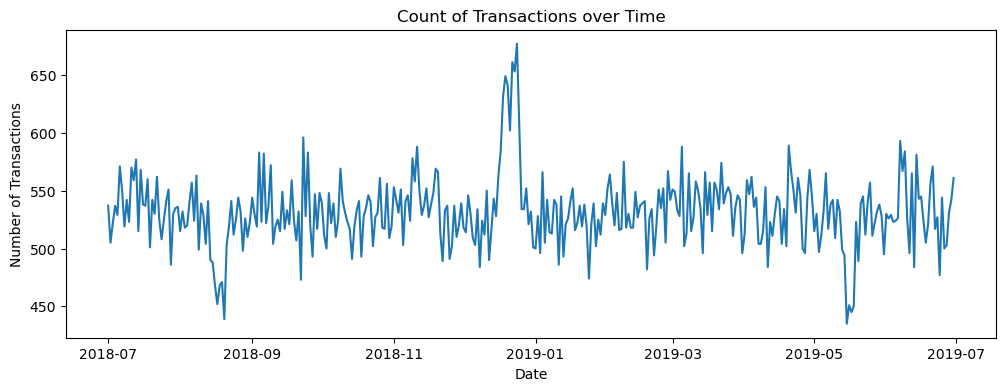

In [26]:
#Transactions over time
txnperdate=df.groupby(df['DATE'])['TXN_ID'].count()
plt.figure(figsize=(12,4))
sns.lineplot(x=txnperdate.index, y=txnperdate.values, palette=pal)
plt.title("Count of Transactions over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.show()

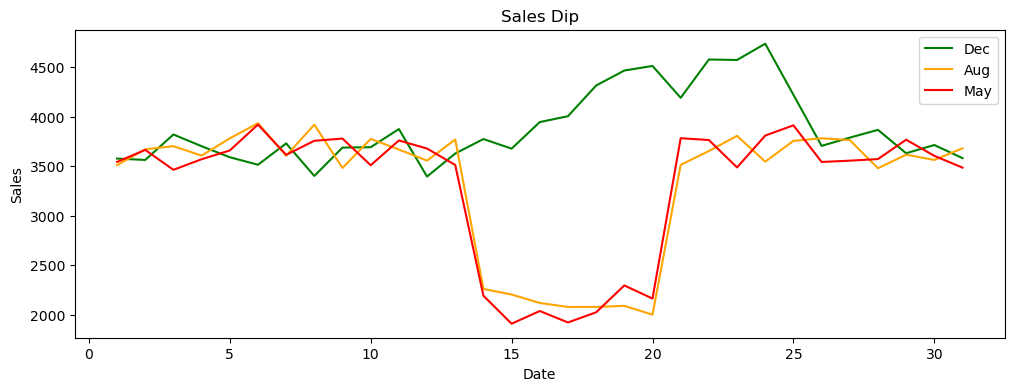

In [27]:
#A spike in total sales and number of transactions can be seen around the end of December 
# and a dip in total sales and number of transactions can be observed in the months of August and May
sales_spike=df[df['DATE_MONTH']==12].groupby(df['DATE_DAY'])['TOT_SALES'].sum()
sales_dip_aug=df[df['DATE_MONTH']==8].groupby(df['DATE_DAY'])['TOT_SALES'].sum()
sales_dip_may=df[df['DATE_MONTH']==5].groupby(df['DATE_DAY'])['TOT_SALES'].sum()
plt.figure(figsize=(12,4))
sns.lineplot(x=sales_spike.index, y=sales_spike.values, color='green', label='Dec')
sns.lineplot(x=sales_dip_aug.index, y=sales_dip_aug.values,color='orange',label='Aug')
sns.lineplot(x=sales_dip_may.index, y=sales_dip_may.values, color='red',label='May')
plt.title("Sales Dip")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

<h5>Observations</h5>
<div>Analysis I</div>
<ul>
<li>175g packs of chips make most sales by a large margin, followed by 150g packs</li>
<li>A spike in total sales and number of transactions can be seen around the end of December</li>
<li>The spike appears in the week before Christmas, peaking on the 24th of the month</li>
<li>Two dips in total sales and number of transactions can be observed in the months of August and May</li>
<li>The dips appear to occur from the 14th to the 20th of the months of August and May</li></ul>

In [28]:
#Identifying the features that may affect Number of Transactions and Average Sales
features=['PKT_SIZE', 'LIFESTAGE', 'PREMIUM_CUSTOMER','PROD_BRAND']

In [29]:
#Function for creating barplots
def plots(fgroup,val):
    plt.figure(figsize=(12,4))
    sns.barplot(x=fgroup.index, y=fgroup.values, palette=pal)
    plt.xlabel(val)
    plt.ylabel("Total Sales")
    plt.show()

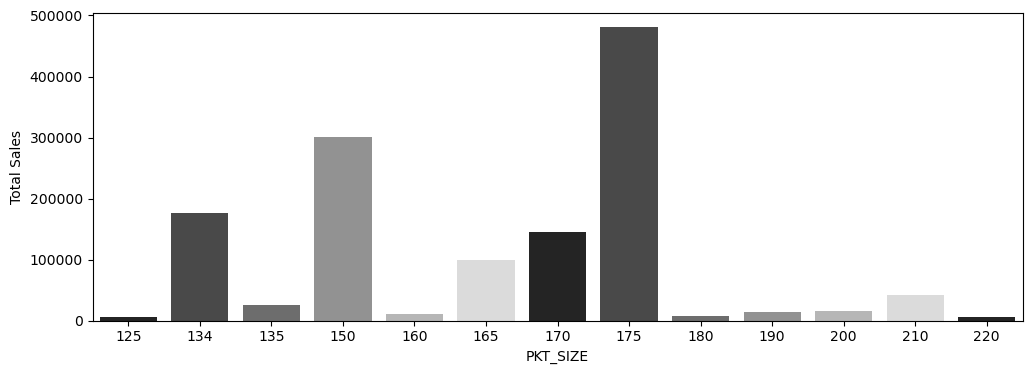

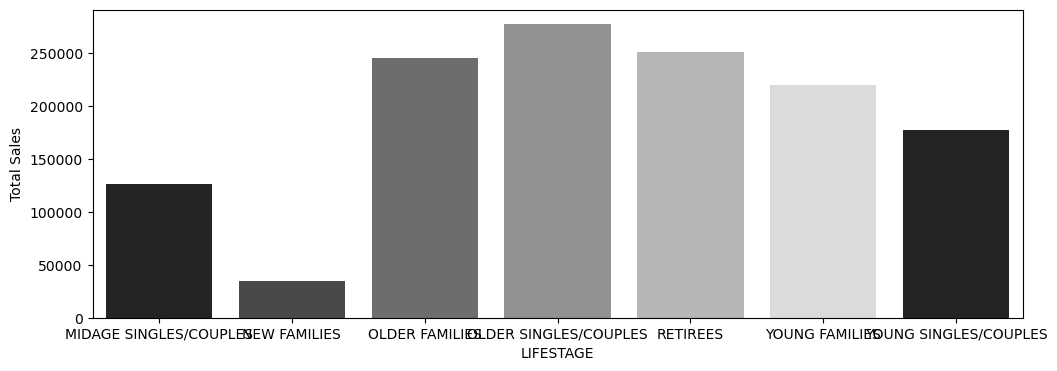

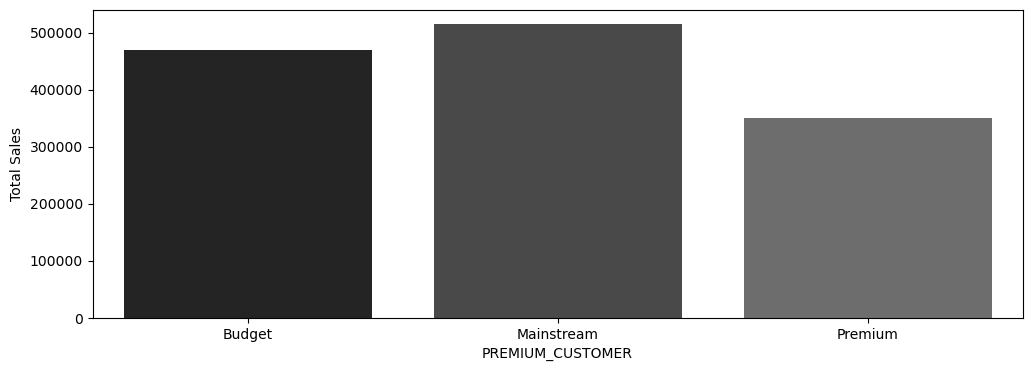

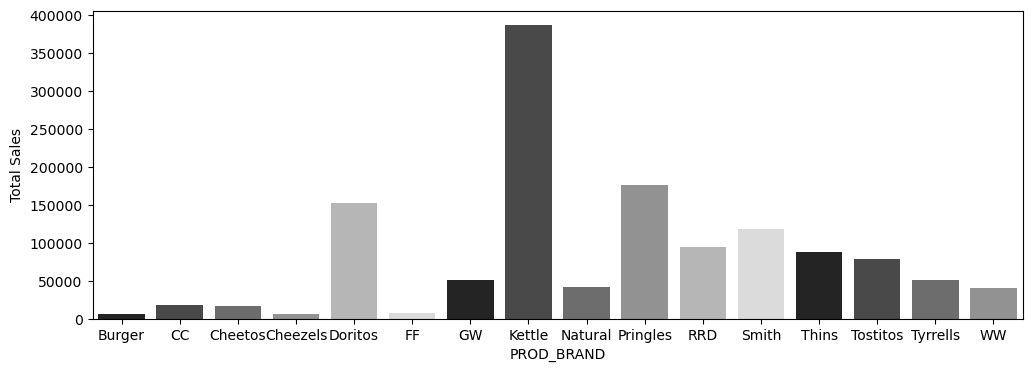

In [30]:
#Total Sales trends for each feature
for feat in features:
    feat_group=df.groupby(df[feat])['TOT_SALES'].sum()
    plots(feat_group, feat)

<div>Analysis II</div>
<ul>
<li>175g packs of chips make most sales by a large margin, followed by 150g packs</li>
<li>OLDER SINGLES/COUPLES, RETIREES and OLDER FAMILIES contribute most toward the chips economy, while NEW FAMILIES contribute the least</li>
<li>Mainstream type customers spend more on chips than Budget or Premium types</li>
<li>Kettle brand chips are the most popular brand. They sell more than any other brand by a large margin, while Burger and Cheezels sell the least</li></ul>


<Axes: ylabel='LIFESTAGE'>

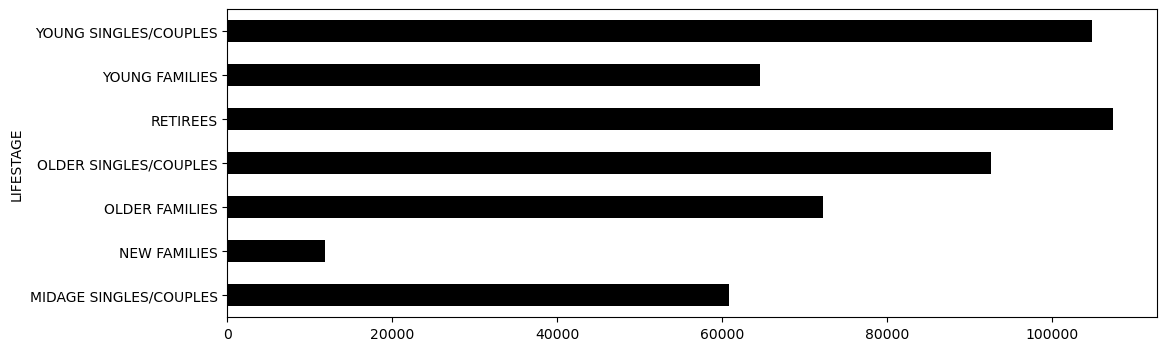

In [31]:
data1=df[df['PREMIUM_CUSTOMER']=='Mainstream'].groupby(['LIFESTAGE'])['TOT_SALES'].sum()
plt.figure(figsize=(12,4))
data1.plot.barh(color='black')

<Axes: xlabel='PREMIUM_CUSTOMER'>

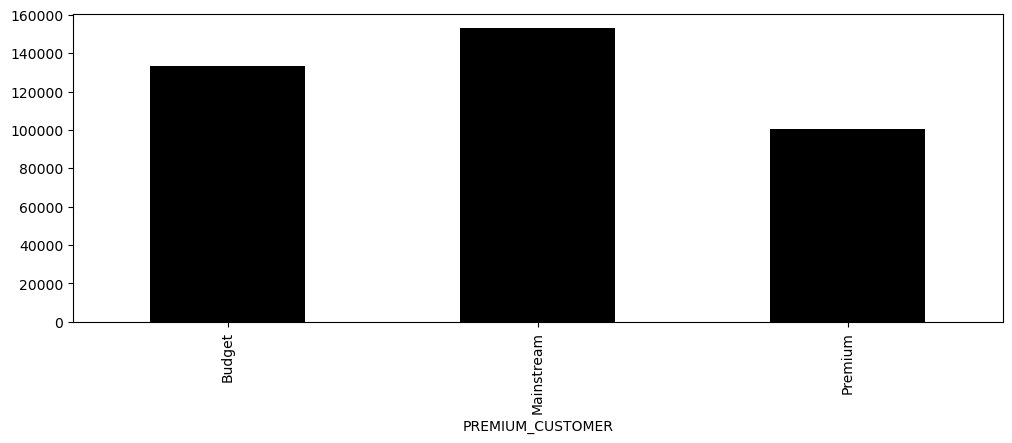

In [32]:
data2=df[df['PROD_BRAND']=='Kettle'].groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
plt.figure(figsize=(12,4))
data2.plot.bar(color='black')

Text(0, 0.5, 'Total sales')

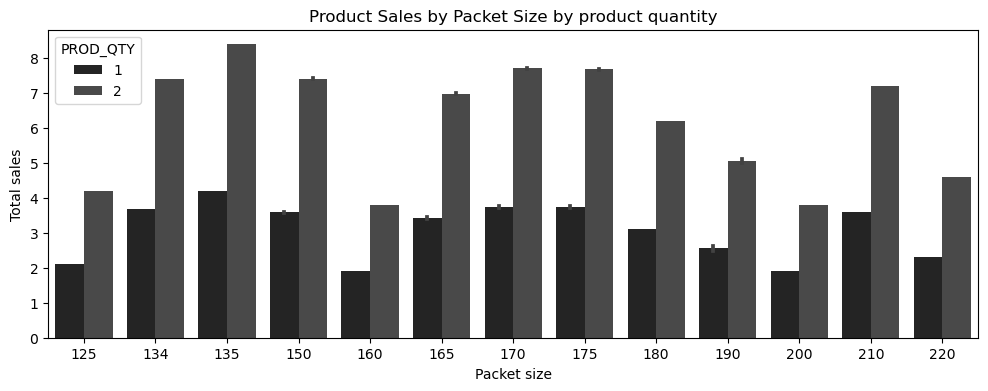

In [33]:
plt.figure(figsize=(12,4))
sns.barplot(data=df,x='PKT_SIZE',y='TOT_SALES',hue='PROD_QTY', palette=pal)
plt.title('Product Sales by Packet Size by product quantity')
plt.xlabel('Packet size')
plt.ylabel('Total sales')

<div>Analysis III</div>
<ul>
<li>Among Mainstream class, RETIREES, YOUNG SINGLES/COUPLES and OLDER  SINGLES/COUPLES contribute more to the sale of chips</li>
<li>Kettle brand sells chips only in 135g, 150g and 175g packs</li>
<li>Products of all sizes appear to sell more in pairs than as a single packet</li></ul>